In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Import functions Pole, GreatCircle, GeogrToView and Stereonet
import sys, os
sys.path.append(os.path.abspath('../functions'))
from Pole import Pole as Pole
from GreatCircle import GreatCircle
from GeogrToView import GeogrToView
from Stereonet import Stereonet

In [ ]:
# Read the strike-dip data from the Big Elk anticline
beasd = np.loadtxt(os.path.abspath('../data/ch5-6/beasd.txt'))
beasd = np.radians(beasd)

In [ ]:
# Draw a lower hemisphere equal angle stereonet
trdv, plgv, intrad = np.radians([0, 90, 10]) 
Stereonet(trdv, plgv, intrad, 0)

# Plot the great circles
# for i in range(beasd.shape[0]):
#     path = GreatCircle(beasd[i,0], beasd[i,1],0)
#     plt.plot(path[:,0], path[:,1], 'b', linewidth=0.5)

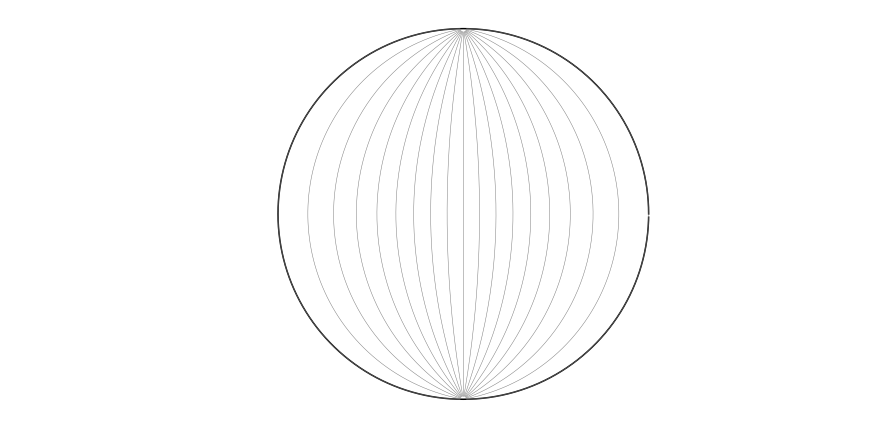

In [2]:
import sys, os
sys.path.append(os.path.abspath('../functions'))

import matplotlib.pyplot as plt
import numpy as np
from stereonet_utils import plot_eq_angle_stereonet

# Draw a lower hemisphere equal angle stereonet
trdv, plgv, intrad = np.radians([0, 90, 10]) 
plot_eq_angle_stereonet(trdv, plgv, intrad)

In [ ]:
from cart_to_sph import cart_to_sph
from rotation import rotation, rotate_axis
from great_circle import great_circle
from st_coord_line import eq_angle_stereonet
from StCoordLine import StCoordLine
from pole_utils import strike_dip_to_trend_plunge
# trd, plg = cart_to_sph(-1, 0, 0)
# R = rotation(0, np.pi, np.pi)
# trd, plg = rotate_axis(R, 0, 0)
# print(StCoordLine(np.pi, 0, 0))
# print(StCoordLine(0, 0, 0))

circle_trd, circle_plg = great_circle(0, 0)
X, Y = eq_angle_stereonet(circle_trd, circle_plg)
plt.plot(X, Y, color='gray', linewidth=0.5)
# plt.axis('equal')
# print(circle_trd[0], circle_plg[0])
# print(X[0], Y[0])
# print()
# print(circle_trd[-2], circle_plg[-2])
# print(circle_trd[-1], circle_plg[-1])
# print(X[-1], Y[-1])
# plt.plot(circle_trd, color='gray', linewidth=0.5)


In [ ]:
trda, plga = strike_dip_to_trend_plunge(0, 0)
R_179 = rotation(trda, plga, np.radians(179))
print(rotate_axis(R_179, 0, 0))
R_180 = rotation(trda, plga, np.radians(180))
print(rotate_axis(R_180, 0, 0))
print(np.dot(R_180, np.array([1, 0, 0])))


In [ ]:
# Draw the same data in an equal angle stereonet,
# but make the view direction = fold axis
trdv, plgv = np.radians([125, 26])
Stereonet(trdv, plgv, intrad, 0)

# Plot the great circles
for i in range(beasd.shape[0]):
    # pole to bed
    trdp, plgp =  Pole(beasd[i,0], beasd[i,1], 1)
    # transform pole
    trdpt, plgpt = GeogrToView(trdp,plgp,trdv,plgv)
    # bed from transformed pole
    striket, dipt = Pole(trdpt,plgpt,0)
    # plot great circle
    path = GreatCircle(striket,dipt,0)
    plt.plot(path[:,0], path[:,1], 'b', linewidth=0.5) 